# 🏢 Northwind Traders – Final Analytics Report  
**AD599 – Phase 3**

---

# Executive Summary

This project analyzes Northwind Traders’ transactional database using SQL and SQL-Python integration to extract performance insights across employees, sales trends, products, and customers.

Structured SQL queries were used to reconstruct revenue logic and generate reproducible performance metrics. These queries were then executed in Python using SQLite and pandas to enable visualization and executive presentation.

### Key Insights

- Revenue is concentrated among top-performing employees.
- Monthly sales trends show periods of growth and decline, suggesting potential seasonality.
- Product performance varies significantly within categories.
- Customer value is unevenly distributed, highlighting opportunities for targeted retention strategies.

These findings demonstrate how structured SQL analysis, when integrated with Python, supports data-driven strategic decision-making.

---

# Methodology

The Northwind relational database was analyzed using a staged SQL workflow:

1. Reconstructed transactional logic using multi-table joins.
2. Standardized revenue definition:

   `line_revenue = UnitPrice × Quantity × (1 – Discount)`

3. Applied aggregation functions (`SUM`, `AVG`) to compute performance metrics.
4. Used window functions (`RANK`, `LAG`) for ranking and trend analysis.
5. Executed SQL queries within Python using `sqlite3` and `pandas` for visualization and reporting.

This approach ensures metric consistency, reproducibility, and alignment between SQL logic and business interpretation.

---

# Part 1: Employee Sales Performance

## Business Objective

Identify top-performing employees based on total revenue contribution.

---

## SQL Approach

Revenue was aggregated at the employee level using `SUM()` and ranked using `RANK()` to preserve ties in performance.

---

## Python Integration

- Executed SQL via `sqlite3` connection
- Loaded results into pandas DataFrame
- Sorted and filtered top performers
- Generated bar chart visualization

---

## Visualization

![Top 5 Employees by Revenue](images/top5_employees.png)

---

## Key Findings

- Revenue is unevenly distributed across employees.
- Top performers contribute a disproportionate share of total sales.
- Performance concentration suggests potential structural advantages (territory, client portfolio, or tenure).

---

## Business Recommendations

- Implement performance-based incentive structures.
- Provide coaching or territory review for mid-tier performers.
- Analyze whether revenue concentration reflects opportunity imbalance.

---

# Part 2️: Monthly Sales Trends

## Business Objective

Evaluate revenue patterns over time to identify growth, volatility, and potential seasonality.

---

## SQL Approach

Revenue was aggregated by year and month. A `LAG()` window function calculated month-over-month change to assess growth dynamics.

---

## Python Integration

- Executed time-based aggregation query
- Converted results into pandas time series format
- Visualized monthly revenue trends using line chart

---

## Visualization

![Top 5 Employees by Revenue](images/monthly_sales.png)

---

## Key Findings

- Revenue demonstrates periodic acceleration and contraction.
- Evidence suggests possible seasonal demand cycles.
- Sales volatility may impact forecasting accuracy.

---

## Business Recommendations

- Incorporate seasonality into inventory and staffing forecasts.
- Investigate drivers of revenue dips.
- Use rolling averages for smoother operational planning.

---

# Part 3️: Product Sales by Category

## Business Objective

Assess product-level performance within categories to identify revenue leaders and underperformers.

---

## SQL Approach

Revenue was aggregated at the product level and partitioned by category using ranking window functions.

---

## Python Integration

- Loaded product-category revenue results into pandas
- Filtered top products within each category
- Generated comparative visualizations

---

## Visualization

![Top 5 Employees by Revenue](images/top3_products.png)

---

## Key Findings

- Strong revenue concentration among select products within categories.
- Presence of a long tail of lower-performing SKUs.
- Product competitiveness varies across categories.

---

## Business Recommendations

- Prioritize marketing for category leaders.
- Reassess pricing or bundling strategies for mid-tier products.
- Evaluate discontinuation of consistently underperforming SKUs.

---

# Part 4️: Customer Purchase Behavior

## Business Objective

Identify high-value customers and evaluate purchase concentration.

---

## SQL Approach

Customer-level revenue was calculated using aggregated transactional data. Average order value and ranking logic were applied to assess segmentation potential.

---

## Python Integration

- Executed customer aggregation query
- Sorted customers by total revenue
- Visualized revenue distribution

---

## Key Findings

- Customer value is highly concentrated among a subset of accounts.
- Significant variance exists in average order value.
- Revenue concentration indicates opportunity for segmentation.

---

## Business Recommendations

- Develop tiered customer segmentation strategy.
- Introduce loyalty incentives for top-tier customers.
- Monitor mid-tier customers for upsell opportunities.
- Identify churn risk among high-value accounts.

---

# Strategic Recommendations

Based on integrated SQL and Python analysis, Northwind Traders should:

1. Develop performance-based employee incentive programs.
2. Incorporate seasonality into operational forecasting.
3. Focus strategic marketing on category-leading products.
4. Implement customer segmentation and retention strategies.
5. Use SQL-Python workflows as a scalable analytics foundation.

---

# Conclusion

This project demonstrates how structured SQL analysis, enhanced through Python integration and visualization, transforms raw relational data into actionable business insights.

By combining query logic with analytical interpretation, Northwind Traders gains clarity across employee performance, sales trends, product strategy, and customer behavior.

The SQL framework established here provides a scalable foundation for future predictive modeling, dashboard automation, and strategic analytics initiatives.

---

# Appendix

Full SQL queries used in this analysis are provided below for reference.






In [2]:
import sqlite3
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
sns.set_theme(style='whitegrid') # Set the theme for the visualizations

db_path = next((p for base in [Path.cwd(), Path.cwd().parent] for p in [base / "data" / "northwind.db"] if p.exists()), None)

# Check if the database file was found
if db_path is None:
    raise FileNotFoundError("data/northwind.db not found (run from project root or notebooks/)")

# Connect to the database
conn = sqlite3.connect(db_path.resolve())

## Part 1: Employee Sales Performance - Bar Chart (Top 5)

Calculate total sales per employee, rank with `RANK()`, run in Python, and build a bar chart for the top 5.

In [4]:
# Query 1: Employee sales
query_employees = """
-- Part 1: Employee sales. Revenue = UnitPrice * Quantity * (1 - Discount). RANK() leaves gaps after ties.
SELECT
    e.EmployeeID,
    e.FirstName || ' ' || e.LastName AS EmployeeName,
    ROUND(SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)), 2) AS TotalSales,
    RANK() OVER (ORDER BY SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) DESC) AS SalesRank
FROM Employees e
JOIN Orders o ON e.EmployeeID = o.EmployeeID
JOIN "Order Details" od ON o.OrderID = od.OrderID
GROUP BY e.EmployeeID, e.FirstName, e.LastName
ORDER BY SalesRank;
"""

# Execute the query and store the result in a DataFrame
df_emp = pd.read_sql_query(query_employees, conn)

# Display the top 5 employees
df_emp_top5 = df_emp.head(5)


In [4]:
df_emp_top5

,EmployeeID,EmployeeName,TotalSales,SalesRank
0,4,Margaret Peacock,51488395.20,1
1,5,Steven Buchanan,51386459.10,2
2,3,Janet Leverling,50445573.76,3
3,1,Nancy Davolio,49659423.23,4
4,7,Robert King,49651899.30,5


In [12]:
os.makedirs("images", exist_ok=True)
os.makedirs("csvs", exist_ok=True)

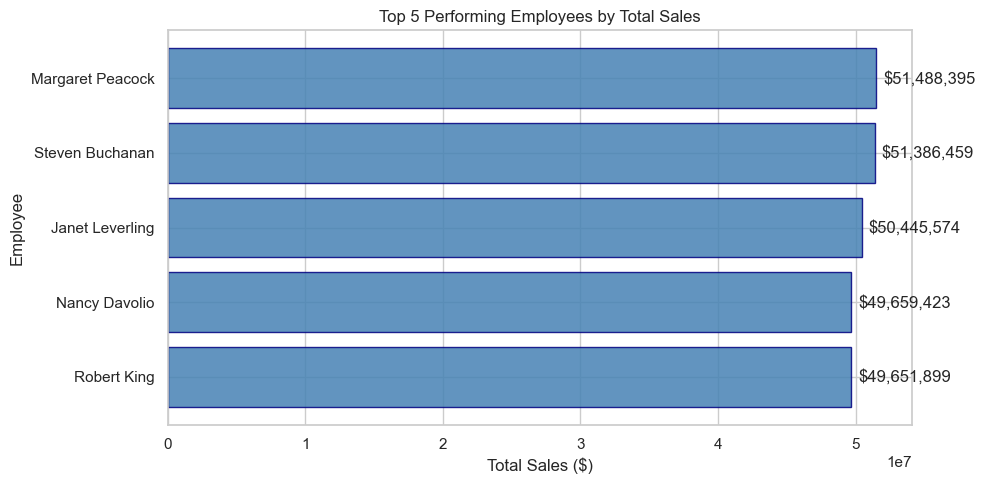

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
bars = ax.barh(df_emp_top5['EmployeeName'][::-1], df_emp_top5['TotalSales'][::-1], color='steelblue', edgecolor='navy', alpha=0.85)
ax.set_xlabel('Total Sales ($)')
ax.set_ylabel('Employee')
ax.set_title('Top 5 Performing Employees by Total Sales')
ax.bar_label(bars, labels=[f"${x:,.0f}" for x in df_emp_top5['TotalSales'][::-1]], padding=5)
plt.tight_layout()
plt.savefig("images/top5_employees.png")
plt.show()

## Part 2: Monthly Sales Trend - Visualization

Aggregate total sales by month, compute month-over-month growth in SQL, run in Python, and visualize sales trends.

In [7]:
# SQL query to get monthly sales and month-over-month growth
query_monthly = """
-- Part 2: Monthly trend + MoM. strftime buckets by YYYY-MM; LAG gives previous month; NULLIF avoids /0.
WITH MonthlySales AS (
    SELECT
        strftime('%Y-%m', o.OrderDate) AS Month,
        SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) AS TotalSales
    FROM Orders o
    JOIN "Order Details" od ON o.OrderID = od.OrderID
    GROUP BY strftime('%Y-%m', o.OrderDate)
)
SELECT
    Month,
    ROUND(TotalSales, 2) AS TotalSales,
    ROUND(LAG(TotalSales) OVER (ORDER BY Month), 2) AS PrevMonthSales,
    ROUND((TotalSales - LAG(TotalSales) OVER (ORDER BY Month)) /
          NULLIF(LAG(TotalSales) OVER (ORDER BY Month), 0) * 100, 2) AS MoM_Growth_Pct
FROM MonthlySales
ORDER BY Month;
"""

# Execute the query and store the result in a DataFrame
df_monthly = pd.read_sql_query(query_monthly, conn)

# Convert the Month column to datetime
df_monthly['Month'] = pd.to_datetime(df_monthly['Month'] + '-01')

# Display the first 10 rows of the DataFrame
df_monthly.head(10)
df_monthly.to_csv("../csvs/monthly_sales.csv", index=False)

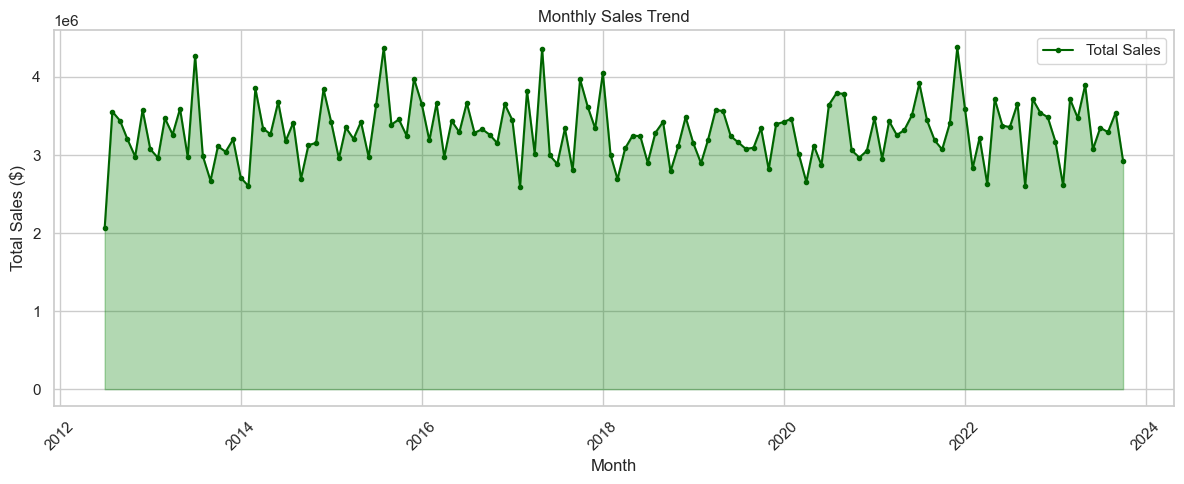

In [16]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(df_monthly['Month'], df_monthly['TotalSales'], marker='o', markersize=3, linewidth=1.5, color='darkgreen', label='Total Sales')
ax.fill_between(df_monthly['Month'], df_monthly['TotalSales'], alpha=0.3, color='green')
ax.set_xlabel('Month')
ax.set_ylabel('Total Sales ($)')
ax.set_title('Monthly Sales Trend')
ax.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/monthly_sales.png")
plt.show()

## Part 3: Product Sales Ranking by Category

Calculate total sales per product, rank within category with `RANK()`, run in Python. Optional: grouped bar chart for top products by category.

In [9]:
query_products = """
-- Part 3: Top products per category. PARTITION BY c.CategoryID resets rank within each category.
SELECT
    c.CategoryName,
    p.ProductName,
    ROUND(SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)), 2) AS TotalSales,
    RANK() OVER (PARTITION BY c.CategoryID ORDER BY SUM(od.UnitPrice * od.Quantity * (1 - od.Discount)) DESC) AS CategoryRank
FROM Categories c
JOIN Products p ON c.CategoryID = p.CategoryID
JOIN "Order Details" od ON p.ProductID = od.ProductID
GROUP BY c.CategoryID, c.CategoryName, p.ProductID, p.ProductName
ORDER BY c.CategoryName, CategoryRank;
"""

df_prod = pd.read_sql_query(query_products, conn)
top_per_category = df_prod[df_prod['CategoryRank'] == 1]
top_per_category

,CategoryName,ProductName,TotalSales,CategoryRank
0,Beverages,Côte de Blaye,53265895.23,1
12,Condiments,Vegie-spread,8810705.20,1
24,Confections,Sir Rodney's Marmalade,16653807.36,1
37,Dairy Products,Raclette Courdavault,11216410.70,1
47,Grains/Cereals,Gnocchi di nonna Alice,7646887.06,1
54,Meat/Poultry,Thüringer Rostbratwurst,24623469.23,1
60,Produce,Manjimup Dried Apples,10664768.65,1
65,Seafood,Carnarvon Tigers,12604671.88,1


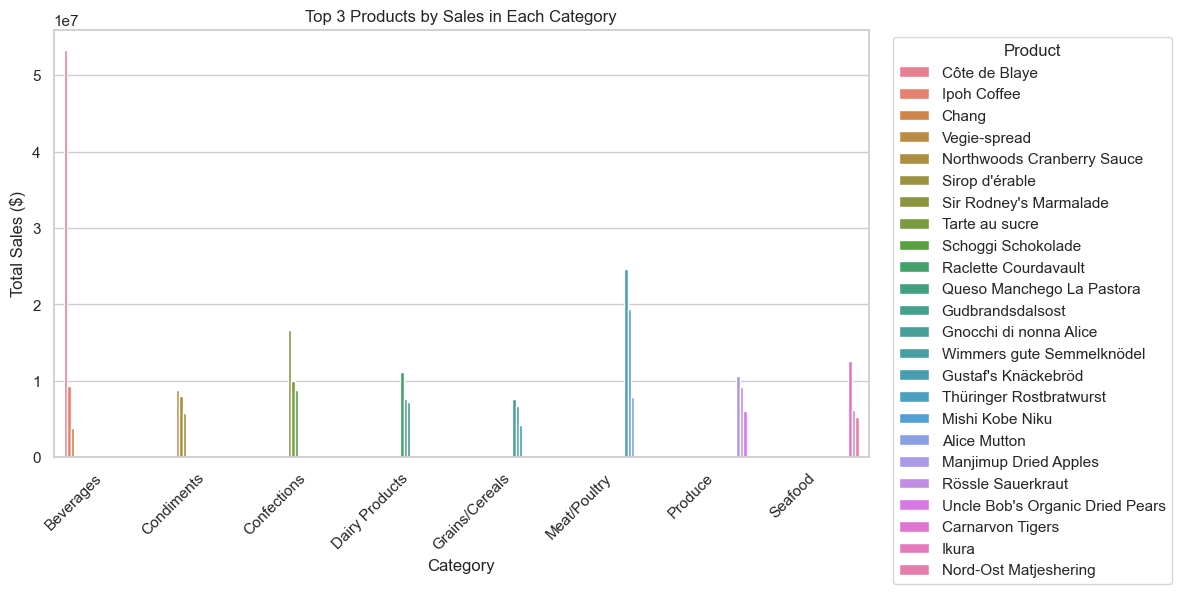

In [17]:
# Top 3 products per category for a readable chart
top3 = df_prod[df_prod['CategoryRank'] <= 3]
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top3, x='CategoryName', y='TotalSales', hue='ProductName', dodge=True, ax=ax)
ax.set_xlabel('Category')
ax.set_ylabel('Total Sales ($)')
ax.set_title('Top 3 Products by Sales in Each Category')
ax.legend(title='Product', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/top3_products.png")
plt.show()

## Part 4: Customer Purchase Behavior - AOV Ranks 2, 3, 5, 8, 12, 15, 17

Average order value per customer, rank with `RANK()`, run in Python, show customers at ranks 2, 3, 5, 8, 12, 15, 17 in a formatted table.

In [11]:
query_customers = """
-- Part 4: Customer AOV. OrderTotals CTE = revenue per order; then AVG per customer + RANK(); filter to given ranks.
WITH OrderTotals AS (
    SELECT OrderID, SUM(UnitPrice * Quantity * (1 - Discount)) AS OrderTotal
    FROM "Order Details"
    GROUP BY OrderID
),
CustomerAOV AS (
    SELECT
        c.CustomerID,
        c.CompanyName,
        ROUND(AVG(ot.OrderTotal), 2) AS AvgOrderValue,
        RANK() OVER (ORDER BY AVG(ot.OrderTotal) DESC) AS AOV_Rank
    FROM Customers c
    JOIN Orders o ON c.CustomerID = o.CustomerID
    JOIN OrderTotals ot ON o.OrderID = ot.OrderID
    GROUP BY c.CustomerID, c.CompanyName
)
SELECT * FROM CustomerAOV WHERE AOV_Rank IN (2, 3, 5, 8, 12, 15, 17)
ORDER BY AOV_Rank;
"""

df_cust = pd.read_sql_query(query_customers, conn)
df_cust.style.format({'AvgOrderValue': '${:,.2f}'}).set_caption('Customers by AOV Rank (2, 3, 5, 8, 12, 15, 17)')

,CustomerID,CompanyName,AvgOrderValue,AOV_Rank
0,PICCO,Piccolo und mehr,"$30,318.79",2
1,Val2,IT,"$30,316.21",3
2,PERIC,Pericles Comidas clásicas,"$30,010.78",5
3,MAISD,Maison Dewey,"$29,727.34",8
4,LACOR,La corne d'abondance,"$29,550.21",12
5,BSBEV,B's Beverages,"$29,305.31",15
6,VAFFE,Vaffeljernet,"$28,894.04",17


In [ ]:
conn.close()